<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_3_1_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [33]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
logs = pd.read_csv('logs.csv')

In [3]:
user_data = pd.read_csv('user_data.csv')

user_data:

client – идентификатор пользователя<br>
premium – является ли клиент премиум<br>
age – возраст<br>

logs:

client – идентификатор пользователя<br>
success – результат (успех - 1, нет - 0)<br>
platform – платформа<br>
time – время в формате Unix<br>

In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


Какой клиент совершил больше всего успешных операций? (success == True)

In [4]:
logs.query('success == True').groupby('client').agg({'success': 'count'}).sort_values('success', ascending=False).head(1)

,success
client,
12179,41


С какой платформы осуществляется наибольшее количество успешных операций?

In [5]:
logs.query('success == True').groupby('platform').agg({'success': 'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


Какую платформу предпочитают премиумные клиенты?

In [6]:
total = logs.merge(user_data, on = 'client')
total.tail()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [28]:
total.groupby('platform').agg({'premium': 'sum'})

,premium
platform,
computer,150
phone,246
tablet,24


In [32]:
#проверка
total.agg({'premium': 'sum'})

premium    420
dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

<Axes: xlabel='premium', ylabel='age'>

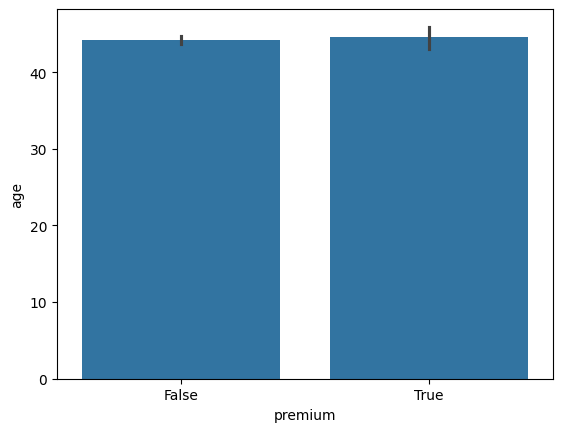

In [37]:
sns.barplot(total, x="premium", y="age")

Постройте график распределения числа успешных операций


In [ ]:
succes = logs.groupby('client').agg({'success': 'sum'})

<ipython-input-59-33e9f6b82f20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(succes)


<Axes: ylabel='Density'>

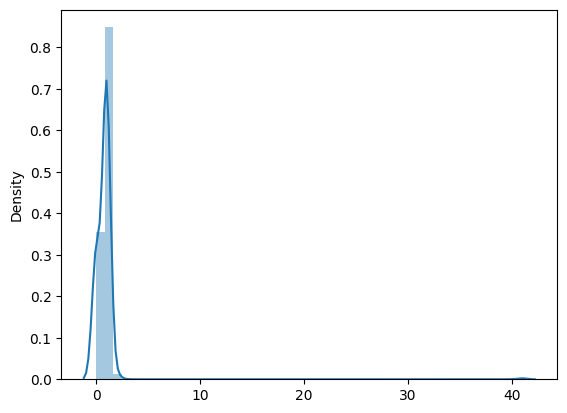

In [59]:
sns.distplot(succes)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [49]:
comp = total.query('platform == "computer"').query('success == True')
comp.head(5)

,client,success,platform,time,premium,age
1,73249,True,computer,1585460504,False,25
2,73249,True,computer,1585430291,False,25
3,73249,True,computer,1585444317,False,25
7,73249,True,computer,1585416826,False,25
11,73249,True,computer,1585428874,False,25


<Axes: xlabel='age', ylabel='count'>

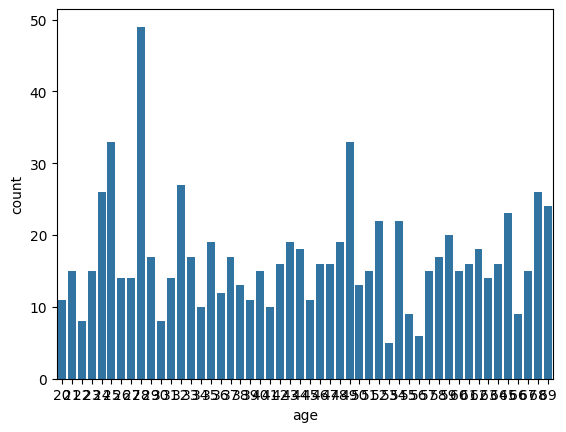

In [51]:
sns.countplot(comp, x='age')